<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/juathan_duarte_relatorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório 4**
##Cálculo Numérico Computacional - T2

> **Nome:** Juathan Coelho Duarte

> **Matrícula:** 19200989

In [916]:
import math
import scipy.integrate as integrate
import numpy as np
from tabulate import tabulate

#**Métodos**

###**Trapézio - Chapra | 1 Segmento**

In [917]:
def trapezioChapraUmSegmento(h, f0, f1):
    trap1 = h * (f0 + f1) / 2
    
    return trap1

###**Trapézio - Chapra | N Segmentos**

In [918]:
def trapComp (h, f, indiceInicial, indiceFinal):
    soma = f(indiceInicial)
    
    for i in range (indiceInicial, indiceFinal-1, 1):
        soma += 2 * f(i)
        
    soma += f(indiceFinal)
    
    return h * soma / 2

###**Simpson 1/3**

In [919]:
def simpson13 (h, f0, f1, f2):
    simp13 = 2 * h * (f0 + 4 * f1 + f2) / 6
    
    return simp13

###**Simpson 1/3 | N Segmentos**

In [920]:
def simpson13MultiplosSegmentos (h, n, f):
    sum = f(0)
    
    for i in range(1, n - 2, 2):
        sum += 4 * f(i) + 2 * f(i + 1)
        
    sum += 4 * f(n - 1) + f(n)
    simp13m = h * sum / 3
    
    return simp13m

###**Simpson 3/8**

In [921]:
def simpson38 (h, f0, f1, f2, f3):
    simp38 = 3 * h * (f0 + 3 * (f1 + f2) + f3) / 8
    
    return simp38

def simp38 (h, f, indiceInicial, indiceFinal):
    sum = 0
    
    for i in range(indiceInicial, indiceFinal - 2, 3):
        sum += simpson38(h, f(i), f(i + 1), f(i + 2), f(i + 3))
        
    return sum

###**Simpson Int**

In [922]:
def simpsonInt (a, b, n, f):
    h = (b - a) / n
    
    if n == 1:
        sum = trapezioChapraUmSegmento(h, f[n - 1], f[n])
    else:
        m = n
        odd = n / 2 - int(n / 2)
        
        if odd > 0 and n > 1:
            sum += simpson38(h, f[n - 3], f[n - 2], f[n - 1], f[n])
            
            m = n - 3
        
        if m > 1:
            sum += simpson13MultiplosSegmentos(h, m, f)
            
    simpInt = sum

    return simpInt

###**Euler**

In [923]:
def euler(x0,y0,xn,n,h):
    x0Vector = []
    ynVector = []
    
    # h = tamanho do passo
    print('-----------Euler------------')
    print('-----------Solução------------')
    print('------------------------------')    
    print('x0\ty0\tf(x,y)\tyn')
    print('------------------------------')
    for i in range(n):
        slope = f(x0, y0)
        yn = y0 + h * slope
        print('%.4f\t%.4f\t%0.4f\t%.4f'% (x0,y0,slope,yn) )
        print('------------------------------')
        y0 = yn
        x0 = x0+h
        x0Vector.append(x0)
        ynVector.append(yn)
    
    print('\nX = %.4f,Y = %.4f' %(xn,yn))
    return x0Vector, ynVector

###**RK4**

In [924]:
def rk4(x0,y0,xn,n, h):
    x0Vector = []
    ynVector = []
    
    print('---------Runge-Kutta---------')
    print('-----------Solução-----------')
    print('-----------------------------')    

    for i in range(n):
          k1 = h * (f(x0, y0))
          k2 = h * (f((x0+h/2), (y0+k1/2)))
          k3 = h * (f((x0+h/2), (y0+k2/2)))
          k4 = h * (f((x0+h), (y0+k3)))
          k = (k1+2*k2+2*k3+k4)/6
          yn = y0 + k
          y0 = yn
          x0 = x0+h
          x0Vector.append(x0)
          ynVector.append(yn)
          print('%.4f\t%.4f\t%.4f'% (x0,y0,yn))
          print('-------------------------')

    print('\nX = %.4f, Y = %.4f' %(xn,yn))
    return x0Vector, ynVector

###**Erros | Absoluto & relativo**

In [925]:
def erroAbsoluto(vexato,vaprox):
    erro = np.zeros(len(vexato))
    
    for i in np.arange(0,len(vexato)):
        erro[i] = abs(vexato[i] - vaprox[i])

    return erro    

def erroRelativoPercentual(vexato,vaprox):
    erro = np.zeros(len(vexato))
    
    for i in np.arange(0,len(vexato)):
        if vaprox[i] != 0:
            erro[i] = abs(vexato[i] - vaprox[i])/abs(vaprox[i]) * 100
        else:
            erro[i] = abs(vexato[i] - vaprox[i])
        
    return erro

#**Exercícios**

###**Exercício 1**

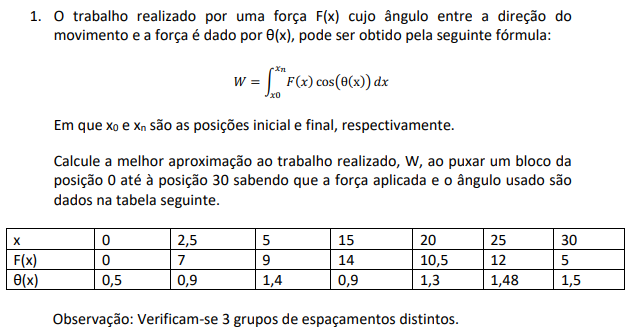

In [926]:
xValue = np.array([0, 2.5, 5, 15, 20, 25, 30])
Fx = np.array([0, 7, 9, 14, 10.5, 12, 5])
Ox = np.array([0.5, 0.9, 1.4, 0.9, 1.3, 1.48, 1.5])

w = lambda x: Fx[x] * math.cos(Ox[x])

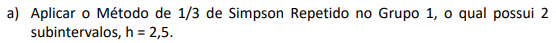

In [927]:
a = 0
b = 5
h = 2.5
n = 2
print(f'Simpson 1/3 composta: {simpson13MultiplosSegmentos(h, n, w)}')

Simpson 1/3 composta: 15.778986164733977


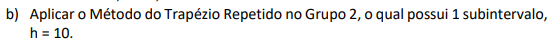

In [928]:
a = 5
b = 15
h = 10
n = 1
indiceInicial = np.where(xValue == a)[0][0]
indiceFinal = np.where(xValue == b)[0][0]
print(f"Trapézio repetido: {trapComp(h, w, indiceInicial, indiceFinal)}")

Trapézio repetido: 51.16121920945736


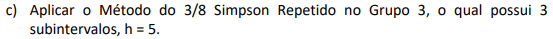

In [929]:
a = 15
b = 30
h = 5
n = 3
indiceInicial = np.where(xValue == a)[0][0]
indiceFinal = np.where(xValue == b)[0][0]
print(f'Simpson 3/8 composta: {simp38(h, w, indiceInicial, indiceFinal)}')

Simpson 3/8 composta: 38.89990714972025


###**Exercício 2**

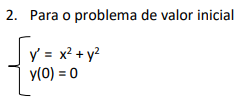

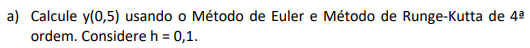

In [930]:
def f(x, y):
  return x**2 + y**2

x0 = 0
y0 = 0
xn = 0.5
h = 0.1
step = int(xn/h)

x0VectorEuler, ynVectorEuler = euler(x0, y0, xn, step, h)
print()
x0VectorRK4, ynVectorRK4 = rk4(x0, y0, xn, step, h)

-----------Euler------------
-----------Solução------------
------------------------------
x0	y0	f(x,y)	yn
------------------------------
0.0000	0.0000	0.0000	0.0000
------------------------------
0.1000	0.0000	0.0100	0.0010
------------------------------
0.2000	0.0010	0.0400	0.0050
------------------------------
0.3000	0.0050	0.0900	0.0140
------------------------------
0.4000	0.0140	0.1602	0.0300
------------------------------

X = 0.5000,Y = 0.0300

---------Runge-Kutta---------
-----------Solução-----------
-----------------------------
0.1000	0.0003	0.0003
-------------------------
0.2000	0.0027	0.0027
-------------------------
0.3000	0.0090	0.0090
-------------------------
0.4000	0.0214	0.0214
-------------------------
0.5000	0.0418	0.0418
-------------------------

X = 0.5000, Y = 0.0418


image.png

In [931]:
fExato = lambda x: x ** 3 / 3
vExatos = []

for i in np.arange(x0, xn, h):
    vExatos.append(fExato(i))

erroAbs = erroAbsoluto(vExatos, ynVectorEuler)
erroRelPer = erroRelativoPercentual(vExatos, ynVectorEuler)

tabela = []
temp = [0, 0, 0, 0]

for i in range(0, len(vExatos)):
    temp[0] = vExatos[i]
    temp[1] = ynVectorEuler[i]
    temp[2] = erroAbs[i]
    temp[3] = erroRelPer[i]
    tabela.append(temp)
    temp = [0, 0, 0, 0]

print('\nTabela de erros absolutos | Euler')
print('--------------------------------------------------------------------')
print(tabulate(tabela, headers = ["Exato", "Aproximado", "Erro Absoluto", "Erro Relativo %"], tablefmt = "github"))
print('--------------------------------------------------------------------')

erroAbs = erroAbsoluto(vExatos, ynVectorRK4)
erroRelPer = erroRelativoPercentual(vExatos, ynVectorRK4)

tabela = []
temp = [0, 0, 0, 0]

for i in range (0, len(vExatos)):
    temp[0] = vExatos[i]
    temp[1] = ynVectorRK4[i]
    temp[2] = erroAbs[i]
    temp[3] = erroRelPer[i]
    tabela.append(temp)
    temp = [0, 0, 0, 0]

print('\nTabela de erros absolutos | RK4')
print('--------------------------------------------------------------------')
print(tabulate(tabela, headers = ["Exato", "Aproximado", "Erro Absoluto", "Erro Relativo %"], tablefmt = "github"))
print('--------------------------------------------------------------------')


Tabela de erros absolutos | Euler
--------------------------------------------------------------------
|       Exato |   Aproximado |   Erro Absoluto |   Erro Relativo % |
|-------------|--------------|-----------------|-------------------|
| 0           |    0         |     0           |            0      |
| 0.000333333 |    0.001     |     0.000666667 |           66.6667 |
| 0.00266667  |    0.0050001 |     0.00233343  |           46.6677 |
| 0.009       |    0.0140026 |     0.0050026   |           35.7262 |
| 0.0213333   |    0.0300222 |     0.00868887  |           28.9415 |
--------------------------------------------------------------------

Tabela de erros absolutos | RK4
--------------------------------------------------------------------
|       Exato |   Aproximado |   Erro Absoluto |   Erro Relativo % |
|-------------|--------------|-----------------|-------------------|
| 0           |  0.000333335 |     0.000333335 |          100      |
| 0.000333333 |  0.00266688  |     

**Resposta:** *Ao comparar os resultados, podemos ver que o método de Runge-Kutta de 4ª ordem (RK4) apresenta erros absolutos menores do que o método de Euler para os mesmos valores. Além disso, o erro relativo para o RK4 é significativamente menor do que para o método de Euler. Essa diferença na precisão dos dois métodos é esperada, uma vez que o RK4 é um método de ordem mais alta do que o método de Euler, o que significa que ele tem uma melhor aproximação da solução exata da equação diferencial. No entanto, o RK4 é mais complexo computacionalmente e requer mais etapas do que o método de Euler. Portanto, ao escolher entre esses dois métodos, é importante equilibrar a precisão necessária com a eficiência computacional. Para problemas em que a precisão é mais importante do que a eficiência, o RK4 pode ser a melhor escolha, enquanto para problemas em que a eficiência é mais importante, o método de Euler pode ser suficiente.*

###**Exercício 3**

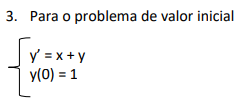

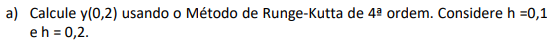

In [932]:
def f(x, y):
    return x + y

x0 = 0
y0 = 1
xn = 0.2
h = 0.1
step = int(xn/h)

print('-----------H = 0.1-----------')
x0VectorRK4_1, ynVectorRK4_1 = rk4(x0, y0, xn, step, h)

print('\n\n-----------H = 0.2-----------')
h = 0.2
step = int(xn/h)

x0VectorRK4_2, ynVectorRK4_2 = rk4(x0, y0, xn, step, h)

-----------H = 0.1-----------
---------Runge-Kutta---------
-----------Solução-----------
-----------------------------
0.1000	1.1103	1.1103
-------------------------
0.2000	1.2428	1.2428
-------------------------

X = 0.2000, Y = 1.2428


-----------H = 0.2-----------
---------Runge-Kutta---------
-----------Solução-----------
-----------------------------
0.2000	1.2428	1.2428
-------------------------

X = 0.2000, Y = 1.2428


image.png

In [933]:
h = 0.1
step = int(xn/h)

fExato = lambda x: x + (x ** 2 / 2)
vExatos = []

for i in np.arange(x0, xn, h):
    vExatos.append(fExato(i))

erroAbs = erroAbsoluto(vExatos, ynVectorRK4_1)
erroRelPer = erroRelativoPercentual(vExatos, ynVectorRK4_1)

tabela = []
temp = [0, 0, 0, 0]

for i in range(0, len(vExatos)):
    temp[0] = vExatos[i]
    temp[1] = ynVectorRK4_1[i]
    temp[2] = erroAbs[i]
    temp[3] = erroRelPer[i]
    tabela.append(temp)
    temp = [0, 0, 0, 0]

print('\nTabela de erros absolutos | RK4 | H = 0.1')
print('----------------------------------------------------------------')
print(tabulate(tabela, headers = ["Exato", "Aproximado", "Erro Absoluto", "Erro Relativo %"], tablefmt = "github"))
print('----------------------------------------------------------------')

h = 0.2
step = int(xn/h)

fExato = lambda x: x+(x**2/2)
vExatos = []

for i in np.arange(x0, xn, h):
  vExatos.append(fExato(i))

erroAbs = erroAbsoluto(vExatos,ynVectorRK4_2)
erroRelPer = erroRelativoPercentual(vExatos, ynVectorRK4_2)

tabela=[]
temp=[0,0,0,0]

for i in range(0,len(vExatos)):
  temp = [vExatos[i],ynVectorRK4_2[i],erroAbs[i], erroRelPer[i]]
  tabela.append(temp)

print('\nTabela de erros absolutos | RK4 | H = 0.2')
print('-------------------------------------------------------------------------')
print(tabulate(tabela,headers=["Exato","Aproximado","Erro absoluto", "Erro relativo percentual"],tablefmt="github"))
print('-------------------------------------------------------------------------')


Tabela de erros absolutos | RK4 | H = 0.1
----------------------------------------------------------------
|   Exato |   Aproximado |   Erro Absoluto |   Erro Relativo % |
|---------|--------------|-----------------|-------------------|
|   0     |      1.11034 |         1.11034 |          100      |
|   0.105 |      1.24281 |         1.13781 |           91.5514 |
----------------------------------------------------------------

Tabela de erros absolutos | RK4 | H = 0.2
-------------------------------------------------------------------------
|   Exato |   Aproximado |   Erro absoluto |   Erro relativo percentual |
|---------|--------------|-----------------|----------------------------|
|       0 |       1.2428 |          1.2428 |                        100 |
-------------------------------------------------------------------------


**Resposta:** *Os resultados obtidos com o método de Runge-Kutta de ordem 4 com h=0.1 e h=0.2 apresentam erros significativos em relação à solução exata do problema. Na tabela de erros absolutos, podemos observar que o erro absoluto aumenta conforme o valor aumenta, indicando que a aproximação fica cada vez mais distante da solução exata à medida que o tempo passa. O erro relativo percentual também é alto, indicando que os erros absolutos são significativos em relação aos valores exatos. Portanto, podemos concluir que a precisão da aproximação obtida com os parâmetros utilizados não é suficiente para aproximar corretamente a solução exata do problema.*